In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import MiniBatchKMeans
from tqdm import tqdm

# Load the dataset
file_path = "US_Accidents_March23.csv"
data = pd.read_csv(file_path)

# Display the first few rows
print("Dataset Loaded Successfully")
# Display all columns
pd.options.display.max_columns = None

# Show the dataset
data.head()  # Displays the first 5 rows with all columns



Dataset Loaded Successfully


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
print(data.isnull().sum())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [9]:

# List of columns to drop
columns_to_drop = ['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)',
                   'Source', 'Airport_Code', 'Description', 'Weather_Timestamp','Country','ID', 'Wind_Direction']

# Drop only columns that exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data.drop(columns=existing_columns_to_drop, inplace=True)

# Impute missing values
numeric_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

categorical_cols = ['Weather_Condition', 'Sunrise_Sunset', 'Street', 'Civil_Twilight',
                    'City', 'Nautical_Twilight', 'Timezone','State','County', 'Astronomical_Twilight','Zipcode']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Drop rows with missing Start_Time or End_Time
data = data.dropna(subset=['Start_Time', 'End_Time'])

# Convert Start_Time and End_Time to datetime
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')
data['End_Time'] = pd.to_datetime(data['End_Time'], errors='coerce')

# Extract time-based features
data['Year'] = data['Start_Time'].dt.year
data['Month'] = data['Start_Time'].dt.month
data['Hour'] = data['Start_Time'].dt.hour
data['Weekday'] = data['Start_Time'].dt.strftime('%a')

# Calculate Duration in minutes
data['Duration'] = round((data['End_Time'] - data['Start_Time']) / np.timedelta64(1, 'm'))

# Drop rows with invalid Duration
data = data[(data['Duration'] >= 0) & (data['Duration'] < 500)]

# Display updated DataFrame info
print(data.info())
print("Missing values in the dataset:")
#print(data.isnull().sum())
 #Verify Duration
print(data[['Start_Time', 'End_Time', 'Duration']].head())


<class 'pandas.core.frame.DataFrame'>
Index: 6847378 entries, 0 to 7728393
Data columns (total 40 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Severity               int64         
 1   Start_Time             datetime64[ns]
 2   End_Time               datetime64[ns]
 3   Start_Lat              float64       
 4   Start_Lng              float64       
 5   Distance(mi)           float64       
 6   Street                 object        
 7   City                   object        
 8   County                 object        
 9   State                  object        
 10  Zipcode                object        
 11  Timezone               object        
 12  Temperature(F)         float64       
 13  Humidity(%)            float64       
 14  Pressure(in)           float64       
 15  Visibility(mi)         float64       
 16  Wind_Speed(mph)        float64       
 17  Weather_Condition      object        
 18  Amenity                bool

In [14]:


# Function for cyclic encoding
def encode_cyclic(data, column, max_value):
    # Ensure the column is numeric
    data[column] = pd.to_numeric(data[column], errors='coerce')
    # Apply cyclic encoding using sine and cosine transformations
    data[column + '_sin'] = np.sin(2 * np.pi * data[column] / max_value)
    data[column + '_cos'] = np.cos(2 * np.pi * data[column] / max_value)
    return data

# Check if 'Hour' column exists, and if not, extract it from 'Start_Time'
if 'Hour' not in data.columns:
    data['Hour'] = pd.to_datetime(data['Start_Time']).dt.hour

# Check if 'Month' column exists, and if not, extract it from 'Start_Time'
if 'Month' not in data.columns:
    data['Month'] = pd.to_datetime(data['Start_Time']).dt.month

# Apply cyclic encoding for Hour, Month, and Weekday columns
data = encode_cyclic(data, 'Hour', 24)
data = encode_cyclic(data, 'Month', 12)

# Apply encoding for Weekday, which is now numeric (e.g., 0-6 for Monday-Sunday)
if 'Weekday' not in data.columns:
    data['Weekday'] = pd.to_datetime(data['Start_Time']).dt.dayofweek
data = encode_cyclic(data, 'Weekday', 7)


# Cluster geographical data using k-means clustering

from sklearn.cluster import MiniBatchKMeans

def find_clusters(data, increment=1100):
    coords = data[['Start_Lng', 'Start_Lat']]
    kmeans = MiniBatchKMeans(n_clusters=increment, batch_size=10000, random_state=42).fit(coords)
    data['Cluster'] = kmeans.predict(data[['Start_Lng', 'Start_Lat']])
    cluster_centers = kmeans.cluster_centers_
    return cluster_centers, len(cluster_centers)

# Perform clustering and store results
cluster_centers, cluster_len = find_clusters(data, increment=1100)

# Extract x, y, z from lat and long for geographical encoding
data['loc_x'] = np.cos(data['Start_Lat']) * np.cos(data['Start_Lng'])
data['loc_y'] = np.cos(data['Start_Lat']) * np.sin(data['Start_Lng'])
data['loc_z'] = np.sin(data['Start_Lat'])

# Output the first few rows to confirm the changes
print(data.head())


   Severity          Start_Time            End_Time  Start_Lat  Start_Lng  \
0         3 2016-02-08 05:46:00 2016-02-08 11:00:00  39.865147 -84.058723   
1         2 2016-02-08 06:07:59 2016-02-08 06:37:59  39.928059 -82.831184   
2         2 2016-02-08 06:49:27 2016-02-08 07:19:27  39.063148 -84.032608   
3         3 2016-02-08 07:23:34 2016-02-08 07:53:34  39.747753 -84.205582   
4         2 2016-02-08 07:39:07 2016-02-08 08:09:07  39.627781 -84.188354   

   Distance(mi)                     Street          City      County State  \
0          0.01                     I-70 E        Dayton  Montgomery    OH   
1          0.01                   Brice Rd  Reynoldsburg    Franklin    OH   
2          0.01             State Route 32  Williamsburg    Clermont    OH   
3          0.01                     I-75 S        Dayton  Montgomery    OH   
4          0.01  Miamisburg Centerville Rd        Dayton  Montgomery    OH   

      Zipcode    Timezone  Temperature(F)  Humidity(%)  Pressure(in)

In [16]:
data['Weekday_sin'].fillna(0, inplace=True)
data['Weekday_cos'].fillna(0, inplace=True)
data['Weekday'].fillna(0, inplace=True)
#data = data.drop('Country', axis=1)
print(data.isnull().sum())
print(data.head())

C:\Users\user\AppData\Local\Temp\ipykernel_3492\1311921308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Weekday_sin'].fillna(0, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3492\1311921308.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Timezone                 0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
Year                     0
Month                    0
H

In [18]:
# List of Boolean features to apply one-hot encoding
boolean_cols_to_encode = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
    'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight',
    'Nautical_Twilight', 'Astronomical_Twilight'
]

# Apply one-hot encoding for each Boolean feature
data = pd.get_dummies(data, columns=boolean_cols_to_encode, drop_first=False)

# Output the first few rows to confirm the changes
print(data.head())


   Severity          Start_Time            End_Time  Start_Lat  Start_Lng  \
0         3 2016-02-08 05:46:00 2016-02-08 11:00:00  39.865147 -84.058723   
1         2 2016-02-08 06:07:59 2016-02-08 06:37:59  39.928059 -82.831184   
2         2 2016-02-08 06:49:27 2016-02-08 07:19:27  39.063148 -84.032608   
3         3 2016-02-08 07:23:34 2016-02-08 07:53:34  39.747753 -84.205582   
4         2 2016-02-08 07:39:07 2016-02-08 08:09:07  39.627781 -84.188354   

   Distance(mi)                     Street          City      County State  \
0          0.01                     I-70 E        Dayton  Montgomery    OH   
1          0.01                   Brice Rd  Reynoldsburg    Franklin    OH   
2          0.01             State Route 32  Williamsburg    Clermont    OH   
3          0.01                     I-75 S        Dayton  Montgomery    OH   
4          0.01  Miamisburg Centerville Rd        Dayton  Montgomery    OH   

      Zipcode    Timezone  Temperature(F)  Humidity(%)  Pressure(in)

In [20]:
def frequency_encode(features, dataframe):
    """
    Perform frequency encoding for the given list of categorical features.
    """
    for feature in features:
        # Calculate the frequency of each unique value
        freq_encoding = dataframe[feature].value_counts(normalize=True)

        # Map the frequencies back to the original column
        dataframe[f"{feature}_freq"] = dataframe[feature].map(freq_encoding)

        # Drop the original column if it is no longer needed
        dataframe = dataframe.drop(columns=[feature])
        print(f"Frequency encoding applied to {feature}.")

    return dataframe

# Columns to frequency encode
features_to_encode = ['City', 'Street','County','Weather_Condition', 'State','Timezone']

# Apply frequency encoding
data = frequency_encode(features_to_encode, data)

# Display the updated dataframe
print(data.head())



Frequency encoding applied to City.
Frequency encoding applied to Street.
Frequency encoding applied to County.
Frequency encoding applied to Weather_Condition.
Frequency encoding applied to State.
Frequency encoding applied to Timezone.
   Severity          Start_Time            End_Time  Start_Lat  Start_Lng  \
0         3 2016-02-08 05:46:00 2016-02-08 11:00:00  39.865147 -84.058723   
1         2 2016-02-08 06:07:59 2016-02-08 06:37:59  39.928059 -82.831184   
2         2 2016-02-08 06:49:27 2016-02-08 07:19:27  39.063148 -84.032608   
3         3 2016-02-08 07:23:34 2016-02-08 07:53:34  39.747753 -84.205582   
4         2 2016-02-08 07:39:07 2016-02-08 08:09:07  39.627781 -84.188354   

   Distance(mi)     Zipcode  Temperature(F)  Humidity(%)  Pressure(in)  \
0          0.01       45424            36.9         91.0         29.68   
1          0.01  43068-3402            37.9        100.0         29.65   
2          0.01       45176            36.0        100.0         29.67   
3  

In [22]:


# chaniging Zipcode to float

# Step 1: Clean up the 'Zipcode' column by removing non-numeric characters
data['Zipcode'] = data['Zipcode'].str.replace('-', '', regex=False)

# Step 2: Convert the cleaned 'Zipcode' values to numeric (float). Invalid values will become NaN
data['Zipcode'] = pd.to_numeric(data['Zipcode'], errors='coerce')

# Step 3: Fill invalid values (NaN) with the mode (most frequent value) of the 'Zipcode' column
zipcode_mode = data['Zipcode'].mode()[0]  # Get the mode (most frequent value)
data['Zipcode'].fillna(zipcode_mode, inplace=True)

# Step 4: Ensure the 'Zipcode' column is of type float (in case it's still not)
data['Zipcode'] = data['Zipcode'].astype(float)

# Display the cleaned 'Zipcode' column
print(data['Zipcode'].head())


0        45424.0
1    430683402.0
2        45176.0
3        45417.0
4        45459.0
Name: Zipcode, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_3492\574234831.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Zipcode'].fillna(zipcode_mode, inplace=True)


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



In [16]:
print(data.isnull().sum())


Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
                              ..
Civil_Twilight_Night           0
Nautical_Twilight_Day          0
Nautical_Twilight_Night        0
Astronomical_Twilight_Day      0
Astronomical_Twilight_Night    0
Length: 66, dtype: int64


In [26]:
# Drop 'Start_Time' and 'End_Time' columns from the dataset
data = data.drop(columns=['Start_Time', 'End_Time'])

# Confirm the columns have been removed
print(data.columns)



Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Zipcode',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Year', 'Month', 'Hour', 'Weekday', 'Duration',
       'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos', 'Weekday_sin',
       'Weekday_cos', 'Cluster', 'loc_x', 'loc_y', 'loc_z', 'Amenity_False',
       'Amenity_True', 'Bump_False', 'Bump_True', 'Crossing_False',
       'Crossing_True', 'Give_Way_False', 'Give_Way_True', 'Junction_False',
       'Junction_True', 'No_Exit_False', 'No_Exit_True', 'Railway_False',
       'Railway_True', 'Roundabout_False', 'Roundabout_True', 'Station_False',
       'Station_True', 'Stop_False', 'Stop_True', 'Traffic_Calming_False',
       'Traffic_Calming_True', 'Traffic_Signal_False', 'Traffic_Signal_True',
       'Turning_Loop_False', 'Sunrise_Sunset_Day', 'Sunrise_Sunset_Night',
       'Civil_Twilight_Day', 'Civil_Twilight_Night', 'Nautical_Twilight_Day',
       'Nautical_Twilight_N

In [28]:


# Sample 12 lakh (1.2 million) rows from the dataset
data = data.sample(n=1200000, random_state=42)

# Assuming 'Severity' is the target and other columns are features
X = data.drop(columns=['Severity'])  # Feature columns
y = data['Severity']  # Target column

# Step 1: Split into train+validate (90%) and test (10%) -> 1.08M + 0.12M
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=100000, random_state=42)

# Step 2: Split train+validate into train (10 lakh) and validate (1 lakh)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=100000, random_state=42)

# Print the sizes of the datasets
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 1000000
Validation set size: 100000
Test set size: 100000


In [30]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 1297626 to 1808046
Data columns (total 64 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Severity                     1200000 non-null  int64  
 1   Start_Lat                    1200000 non-null  float64
 2   Start_Lng                    1200000 non-null  float64
 3   Distance(mi)                 1200000 non-null  float64
 4   Zipcode                      1200000 non-null  float64
 5   Temperature(F)               1200000 non-null  float64
 6   Humidity(%)                  1200000 non-null  float64
 7   Pressure(in)                 1200000 non-null  float64
 8   Visibility(mi)               1200000 non-null  float64
 9   Wind_Speed(mph)              1200000 non-null  float64
 10  Year                         1200000 non-null  float64
 11  Month                        1200000 non-null  float64
 12  Hour                         1200000 non-

In [30]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression on classification target
X_cls = data.drop(columns=['Severity'])
y_cls = data['Severity']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.1, random_state=42)

scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

# Train
lr_cls = LinearRegression()
lr_cls.fit(X_train_c_scaled, y_train_c)

# Predict and round to nearest integer to simulate classification
y_pred_cls = np.round(lr_cls.predict(X_test_c_scaled)).astype(int)

# Clamp predictions to valid severity range (e.g., 1–4)
y_pred_cls = np.clip(y_pred_cls, y_cls.min(), y_cls.max())

# Evaluation
print("Pseudo-Classification via Linear Regression:")
print(confusion_matrix(y_test_c, y_pred_cls))
print(classification_report(y_test_c, y_pred_cls))


ValueError: could not convert string to float: 'Overseas Hwy'

In [33]:


# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Validate the model on the validation set
y_val_pred_lr = lr_model.predict(X_val)
val_accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
print(f"Logistic Regression Validation Accuracy: {val_accuracy_lr:.4f}")

# Test the model on the test set
y_test_pred_lr = lr_model.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
print(f"Logistic Regression Test Accuracy: {test_accuracy_lr:.4f}")


Logistic Regression Validation Accuracy: 0.7750
Logistic Regression Test Accuracy: 0.7736


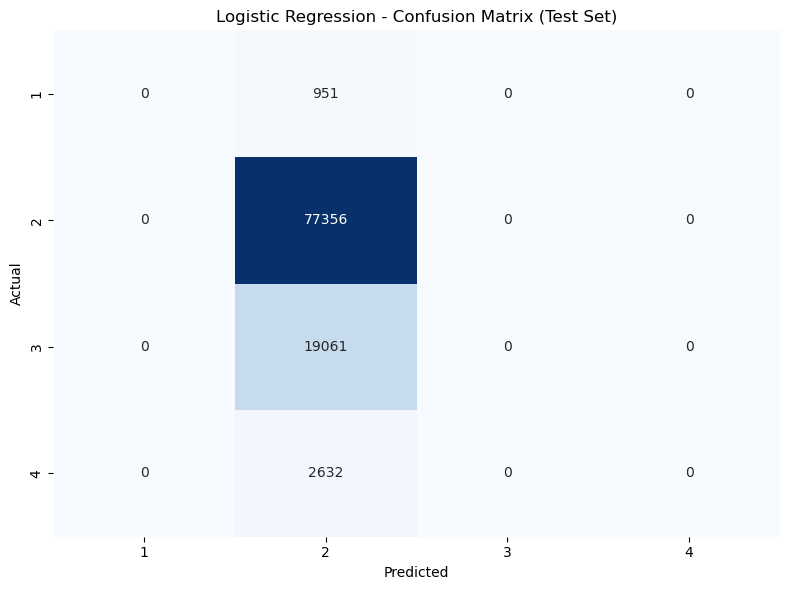

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       951
           2       0.77      1.00      0.87     77356
           3       0.00      0.00      0.00     19061
           4       0.00      0.00      0.00      2632

    accuracy                           0.77    100000
   macro avg       0.19      0.25      0.22    100000
weighted avg       0.60      0.77      0.67    100000



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred_lr)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix (Test Set)')
plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_lr))


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train on training data
dt_model.fit(X_train, y_train)

# Predict on validation data
y_val_pred = dt_model.predict(X_val)

# Evaluate on validation data
print("Decision Tree Classifier Results (Validation Set):")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# If you want to predict on test data too:
y_test_pred = dt_model.predict(X_test)

print("Decision Tree Classifier Results (Test Set):")
print("Accuracy:", accuracy_score(y_test, y_test_pred))


Decision Tree Classifier Results (Validation Set):
Accuracy: 0.84992
Confusion Matrix:
 [[  551   334   106    14]
 [  350 70264  5448  1438]
 [  109  5137 13304   361]
 [   19  1314   378   873]]
Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.55      0.54      1005
           2       0.91      0.91      0.91     77500
           3       0.69      0.70      0.70     18911
           4       0.33      0.34      0.33      2584

    accuracy                           0.85    100000
   macro avg       0.62      0.62      0.62    100000
weighted avg       0.85      0.85      0.85    100000

Decision Tree Classifier Results (Test Set):
Accuracy: 0.84889


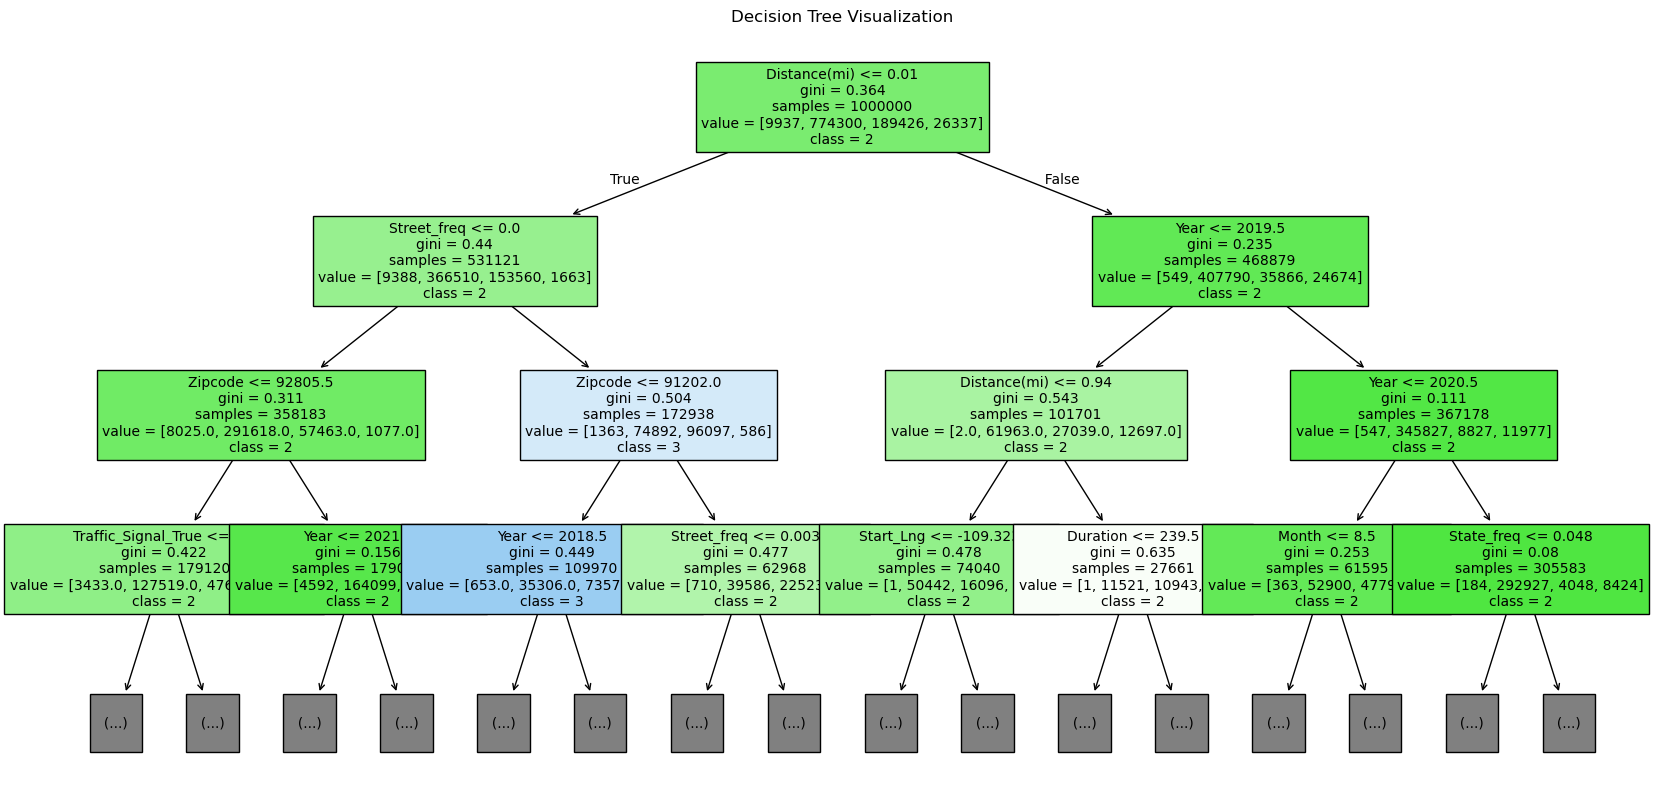

In [39]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set figure size
plt.figure(figsize=(20,10))  # You can adjust size as needed

# Plot the tree (limit depth for clarity if needed)
plot_tree(dt_model,
          feature_names=X_train.columns,
          class_names=[str(i) for i in sorted(y_train.unique())],  # Severity classes
          filled=True,
          max_depth=3,   # Show only first 3 levels for clarity (remove if you want full tree)
          fontsize=10)

plt.title("Decision Tree Visualization")
plt.show()


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model multiple 
mlr_model = LinearRegression()

# Train (fit) the model
mlr_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred_mlr = mlr_model.predict(X_val)

# Evaluate
print("Multiple Linear Regression Results (Validation Set):")
print("Mean Squared Error:", mean_squared_error(y_val, y_val_pred_mlr))
print("R2 Score:", r2_score(y_val, y_val_pred_mlr))

# Optionally, predict on test set
y_test_pred_mlr = mlr_model.predict(X_test)
print("\nMultiple Linear Regression Results (Test Set):")
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred_mlr))
print("R2 Score:", r2_score(y_test, y_test_pred_mlr))


Multiple Linear Regression Results (Validation Set):
Mean Squared Error: 0.21738173675761477
R2 Score: 0.12795826739264848

Multiple Linear Regression Results (Test Set):
Mean Squared Error: 0.21777111763775756
R2 Score: 0.13157503712914387


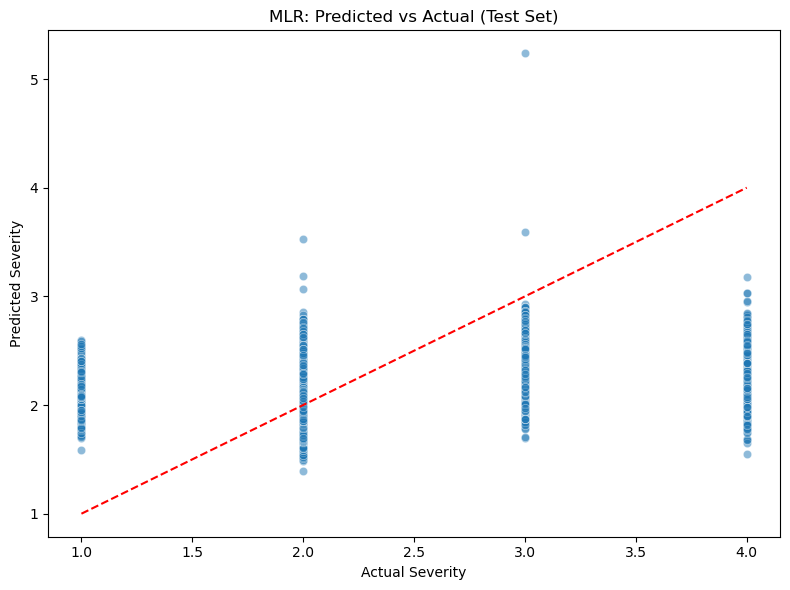

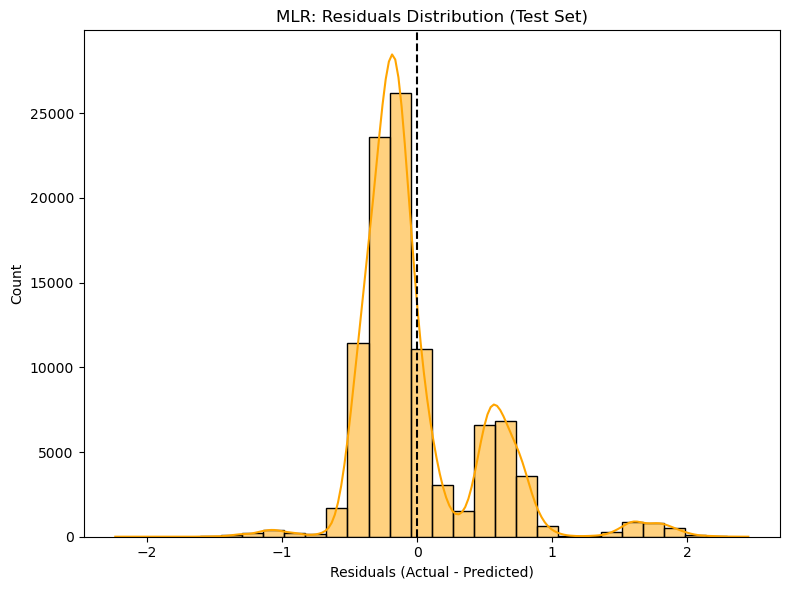

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Predicted vs Actual ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred_mlr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Severity")
plt.ylabel("Predicted Severity")
plt.title("MLR: Predicted vs Actual (Test Set)")
plt.tight_layout()
plt.show()

# --- 2. Residuals Plot ---
residuals = y_test - y_test_pred_mlr

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("MLR: Residuals Distribution (Test Set)")
plt.tight_layout()
plt.show()


Polynomial Linear Regression (degree=2) - Validation (on sample):
Mean Squared Error: 0.23530795097260793
R2 Score: 0.06500929645535702


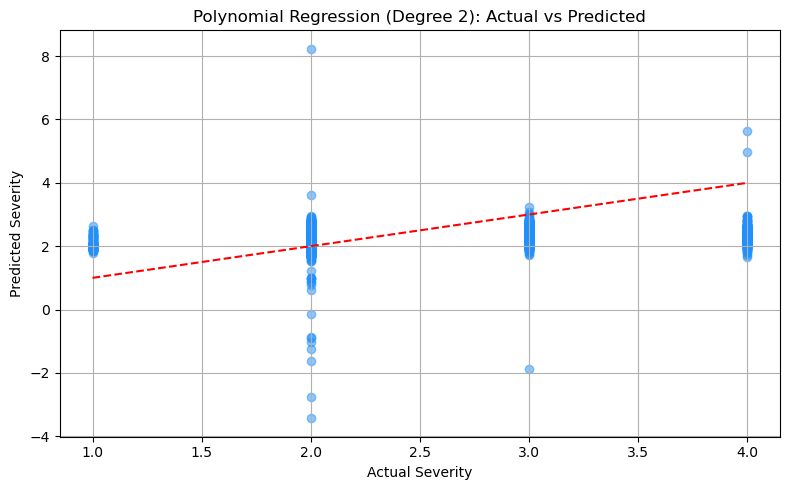

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the degree of the polynomial
degree = 2
sample_size = 10000

# Subsample the training set
X_sample = X_train[:sample_size]
y_sample = y_train[:sample_size]
X_val_sample = X_val[:sample_size]  # For consistent plotting
y_val_sample = y_val[:sample_size]

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_sample_poly = poly.fit_transform(X_sample)
X_val_poly = poly.transform(X_val_sample)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_sample_poly, y_sample)

# Predict
y_val_pred_poly = poly_model.predict(X_val_poly)

# Evaluation
print(f"Polynomial Linear Regression (degree={degree}) - Validation (on sample):")
print("Mean Squared Error:", mean_squared_error(y_val_sample, y_val_pred_poly))
print("R2 Score:", r2_score(y_val_sample, y_val_pred_poly))

# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_val_sample, y_val_pred_poly, alpha=0.5, color='dodgerblue')
plt.plot([y_val_sample.min(), y_val_sample.max()],
         [y_val_sample.min(), y_val_sample.max()],
         color='red', linestyle='--')
plt.xlabel("Actual Severity")
plt.ylabel("Predicted Severity")
plt.title(f"Polynomial Regression (Degree {degree}): Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scale the features for better SVM performance
scaler_svm = StandardScaler()
X_train_scaled = scaler_svm.fit_transform(X_train)
X_val_scaled = scaler_svm.transform(X_val)
X_test_scaled = scaler_svm.transform(X_test)

# Initialize the SVM model (you can try different kernels: 'linear', 'poly', 'rbf', 'sigmoid')
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on validation and test sets
y_val_pred_svm = svm_model.predict(X_val_scaled)
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate performance
print("SVM Classification (Validation Set):")
print("Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print(classification_report(y_val, y_val_pred_svm))
print("\nSVM Classification (Test Set):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print(classification_report(y_test, y_test_pred_svm))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- 1. Confusion Matrix Plot ---
cm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Severity')
plt.ylabel('Actual Severity')
plt.title('SVM Confusion Matrix (Test Set)')
plt.tight_layout()
plt.show()

# --- 2. Bar Plot of Classification Report Scores ---
from sklearn.metrics import classification_report
import pandas as pd

# Extract precision, recall, f1-score from classification report
report = classification_report(y_test, y_test_pred_svm, output_dict=True)
report_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

# Plot
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('SVM Classification Report Metrics (Test Set)')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [32]:


# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Validate the model on the validation set
y_val_pred_rf = rf_model.predict(X_val)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest Validation Accuracy: {val_accuracy_rf:.4f}")

# Test the model on the test set
y_test_pred_rf = rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}")


Random Forest Validation Accuracy: 0.8895
Random Forest Test Accuracy: 0.8892


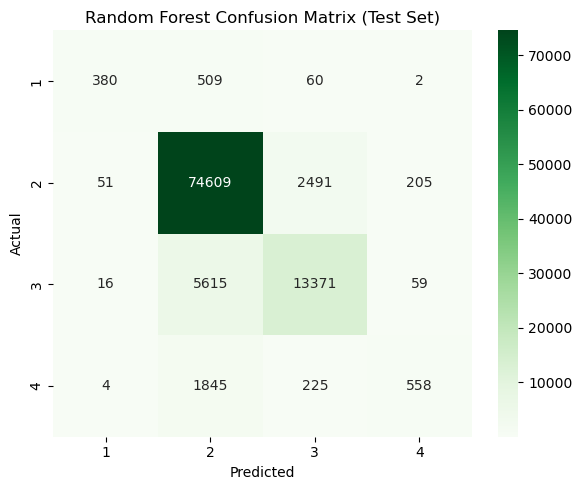

C:\Users\user\AppData\Local\Temp\ipykernel_3492\1968605304.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")


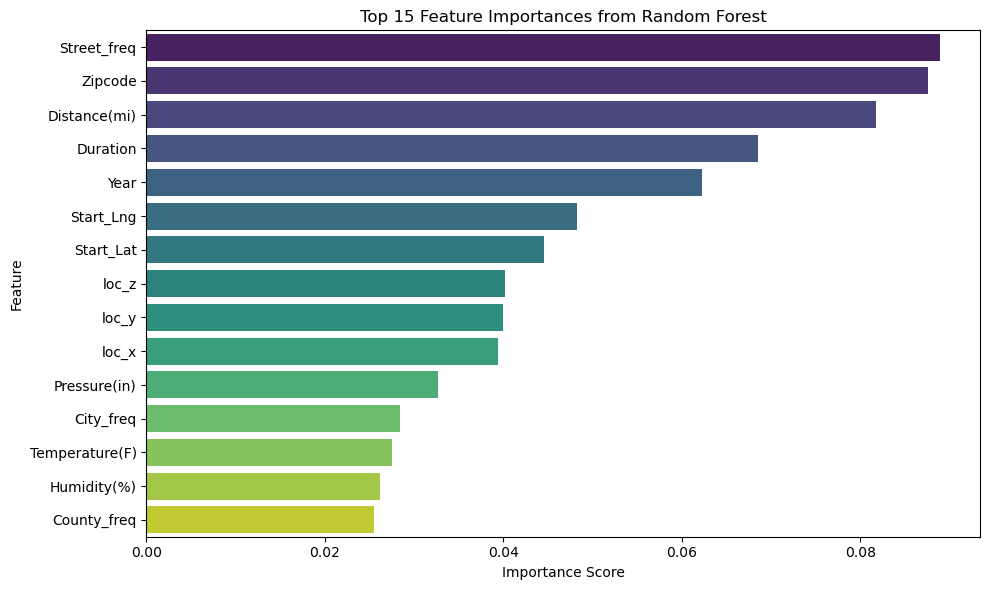

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# --- Plot 1: Confusion Matrix  Random Forest ---
cm = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# --- Plot 2: Feature Importances ---
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")
plt.title('Top 15 Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Naive Bayes Validation Accuracy: 0.7750

Classification Report (Validation):
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1005
           2       0.78      1.00      0.87     77500
           3       0.00      0.00      0.00     18911
           4       0.00      0.00      0.00      2584

    accuracy                           0.78    100000
   macro avg       0.19      0.25      0.22    100000
weighted avg       0.60      0.78      0.68    100000



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naive Bayes Test Accuracy: 0.7736

Classification Report (Test):
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       951
           2       0.77      1.00      0.87     77356
           3       0.00      0.00      0.00     19061
           4       0.00      0.00      0.00      2632

    accuracy                           0.77    100000
   macro avg       0.19      0.25      0.22    100000
weighted avg       0.60      0.77      0.67    100000



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


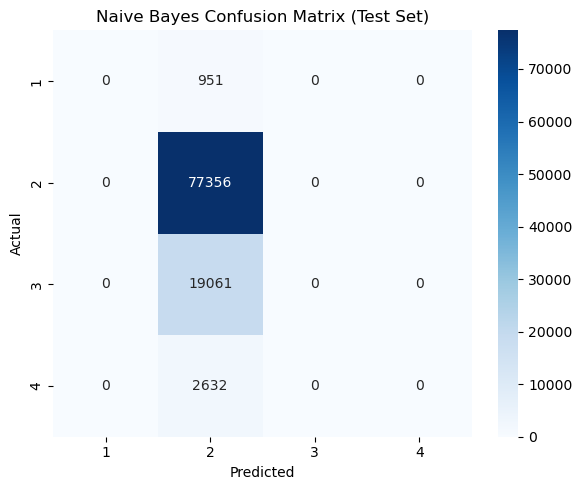

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the model Naive Bayes Classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred_nb = nb_model.predict(X_val)

# Evaluate
val_acc_nb = accuracy_score(y_val, y_val_pred_nb)
print(f"Naive Bayes Validation Accuracy: {val_acc_nb:.4f}")
print("\nClassification Report (Validation):\n", classification_report(y_val, y_val_pred_nb))

# Predict on test set
y_test_pred_nb = nb_model.predict(X_test)
test_acc_nb = accuracy_score(y_test, y_test_pred_nb)
print(f"Naive Bayes Test Accuracy: {test_acc_nb:.4f}")
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_nb))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_test_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix (Test Set)')
plt.tight_layout()
plt.show()
